# **Supermarket Smart Management System: A Data-Driven Approach to Profit, Demand, and Loyalty**

## ------------------------------------------------------------------------------------------------

# ***Problem Statements & Models***
## Model 1 – Forecast Monthly Profit 

### *Goal:* Develop a model to accurately forecast the **total profit** for the upcoming month across a selection of Cargills outlets.  

### *Why it's useful:* This helps with **financial planning, budgeting, and performance assessment** by giving managers a clearer picture of expected revenues.  

### *Model Type:* This is a **Regression task**, as we are predicting a continuous numeric value (profit).  

## Model 2 – Identify Potential Loyalty Members  

### *Goal:* Predict whether a customer is a **NexusMember ('Yes' or 'No')** based on their purchasing behavior.  

### *Why it's useful:* This model can identify **customers who behave like loyalty members** (e.g., frequent purchases, high spending) but haven’t signed up yet. The supermarket can then target these customers with **personalized promotions** to encourage them to join the Nexus program.  

### *Model Type:* This is a **Classification task**, as we are predicting a categorical outcome (Yes = 1, No = 0).  

## Predict High-Demand Items  

### *Goal:* Forecast which products (**Item_Description**) will experience the **highest demand** (based on total Quantity sold) in the upcoming month.  

### *Why it's useful:* By knowing which items will be in demand, the supermarket can:  
- Optimize **inventory management**  
- Prevent **stockouts**  
- Improve **stock allocation** across outlets  
- Run **targeted promotions and marketing**  

### *Model Type:* This is a **Forecasting + Ranking task**, as we are predicting future demand and ranking items by expected sales volume.  


## ------------------------------------------------------------------------------------------------

# ***Model 1 - Predict Next-Month's Profit***

## 2. Data Understanding

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection & Initial Overview**

In [79]:
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [80]:
# Display the total number of rows and columns
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Display the first 5 rows to get a feel for the data
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())

# Display data types and non-null counts for each column
print("\n--- Data Types and Non-Null Counts ---")
df.info()



Dataset Shape: 2500 rows and 20 columns

--- First 5 Rows of the Dataset ---
         Date      Time  Age  Gender NexusMember  NexusNumber  \
0  2025-01-15  15:35:38   46    Male          No          NaN   
1  2025-03-05  06:45:15   55  Female         Yes     791270.0   
2  2025-01-08  13:03:41   34  Female          No          NaN   
3  2025-07-08  14:27:51   45  Female         Yes     532117.0   
4  2024-12-10  04:05:44   25  Female         Yes     840405.0   

                         Outlet_Name                         Address  \
0  Cargills Food City - Battaramulla        33 Main St, Battaramulla   
1        Cargills Food City - Malabe         780 Kaduwela Rd, Malabe   
2    Cargills Food City - Maharagama  125 Piliyandala Rd, Maharagama   
3      Cargills Food City - Nugegoda     210 High Level Rd, Nugegoda   
4      Cargills Food City - Nugegoda     210 High Level Rd, Nugegoda   

   InvoiceNumber  Item_Code                       Item_Description Department  \
0         120000 

**Summary Statistics**

In [81]:
print("\nSummary Statistics")

# Calculate descriptive statistics for numerical columns
# This gives us the mean, median (50%), std dev, min, max, etc.
print("\nDescriptive Statistics for Numerical Columns")
print(df.describe())

# Calculate descriptive statistics for categorical columns
# This shows counts, number of unique values, top value, and its frequency.
print("\nDescriptive Statistics for Categorical Columns")
print(df.describe(include='object'))


Summary Statistics

Descriptive Statistics for Numerical Columns
               Age    NexusNumber  InvoiceNumber    Item_Code     Quantity  \
count  2500.000000    1223.000000     2500.00000  2500.000000  2500.000000   
mean     39.125600  547547.143091   121249.50000    25.494400     2.512800   
std      12.485967  259219.872378      721.83216    14.716542     1.121401   
min      18.000000  100330.000000   120000.00000     1.000000     1.000000   
25%      28.000000  325503.500000   120624.75000    12.000000     2.000000   
50%      39.000000  547581.000000   121249.50000    25.000000     3.000000   
75%      50.000000  758356.500000   121874.25000    39.000000     4.000000   
max      60.000000  999841.000000   122499.00000    50.000000     4.000000   

        Unit_Price     Discount   TotalValue  Loyalty_Points_Earned  \
count  2500.000000  2500.000000  2500.000000            2500.000000   
mean    444.664500     7.436000  1043.646956               6.546400   
std     331.353308

**Identifying Issues: Missing Values & Duplicates**

In [82]:
print("\nIdentifying Potential Issues")

# Check for missing (null) values in each column
print("\nCount of Missing Values per Column")
missing_values = df.isnull().sum()
print(missing_values)
print("\nNOTE: The 'NexusNumber' column has missing values by design.")
print("This is expected for customers who are not Nexus members.")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nCount of Duplicate Rows \n{duplicate_rows}")


Identifying Potential Issues

Count of Missing Values per Column
Date                        0
Time                        0
Age                         0
Gender                      0
NexusMember                 0
NexusNumber              1277
Outlet_Name                 0
Address                     0
InvoiceNumber               0
Item_Code                   0
Item_Description            0
Department                  0
Item_Category               0
Quantity                    0
Unit_Price                  0
Discount                    0
TotalValue                  0
Payment_Method              0
Loyalty_Points_Earned       0
Profit                      0
dtype: int64

NOTE: The 'NexusNumber' column has missing values by design.
This is expected for customers who are not Nexus members.

Count of Duplicate Rows 
0


**Data Visualization**


Data Visualization
Generating and saving visualizations...
  - Generating histograms...


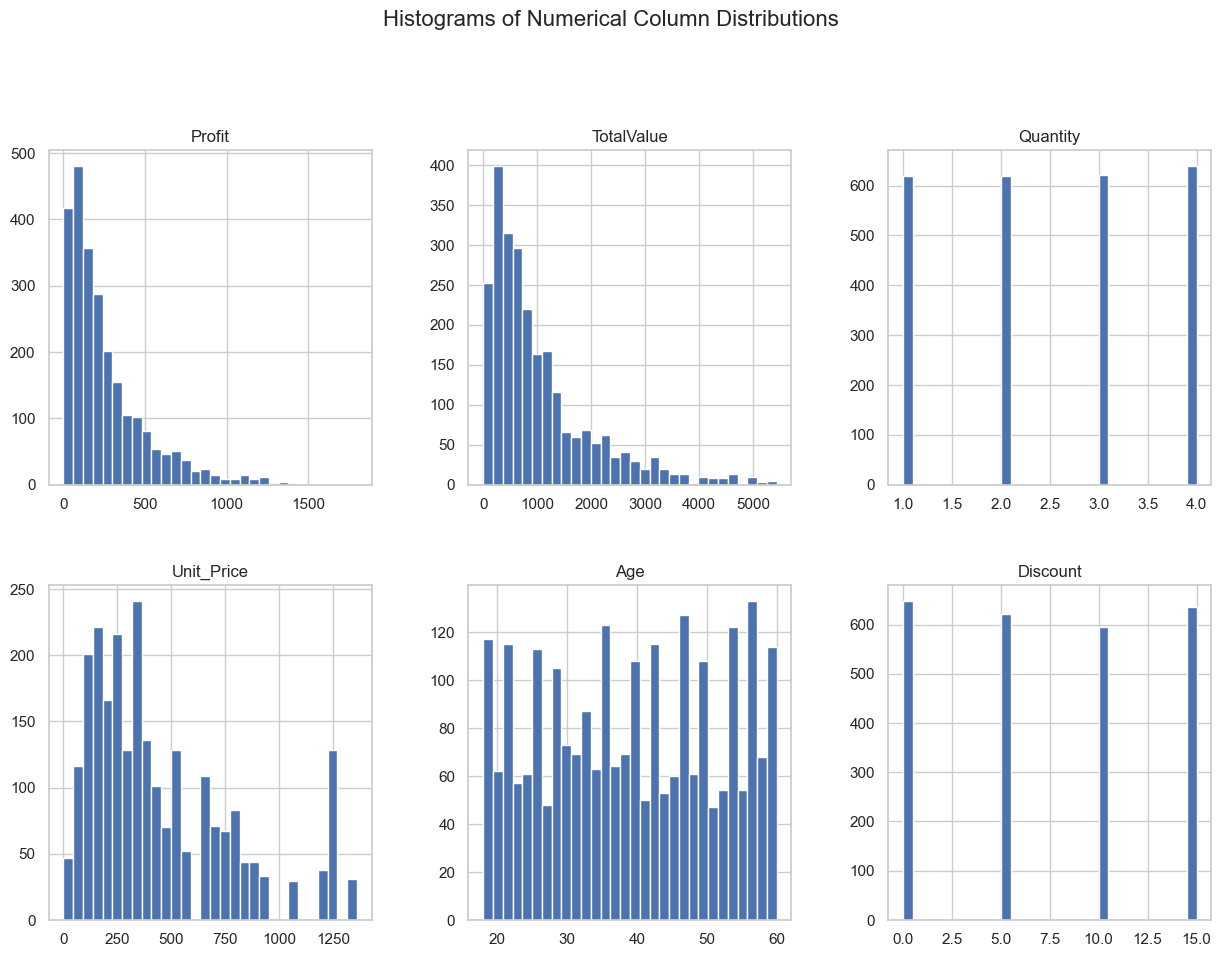

  - Generating box plots...


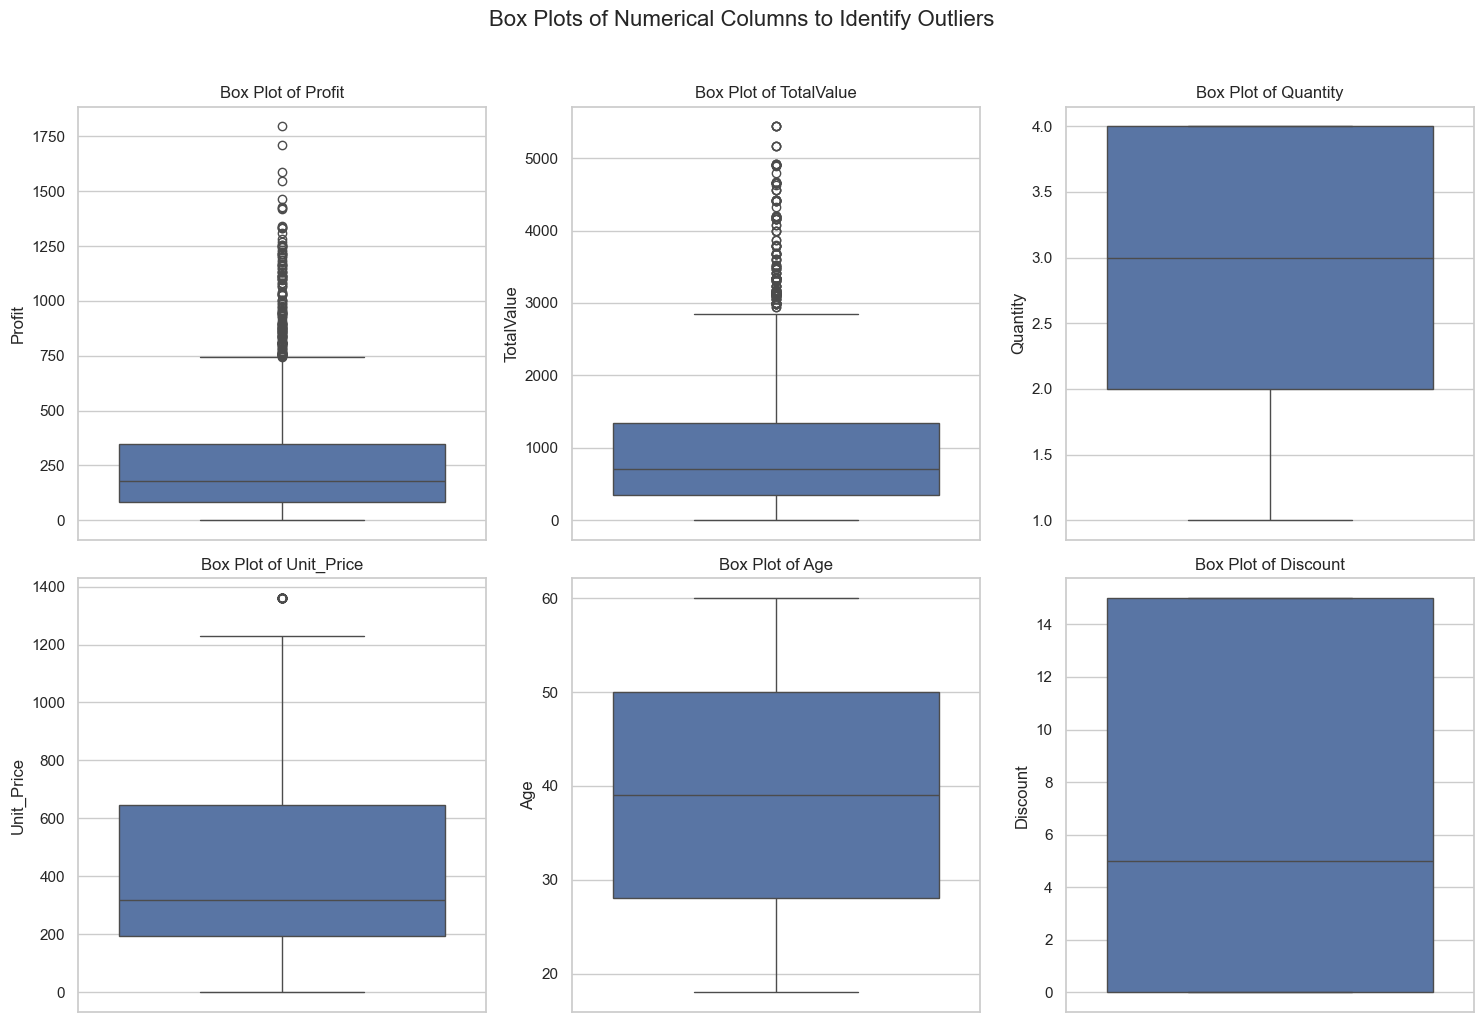

  - Generating bar charts for categorical data...


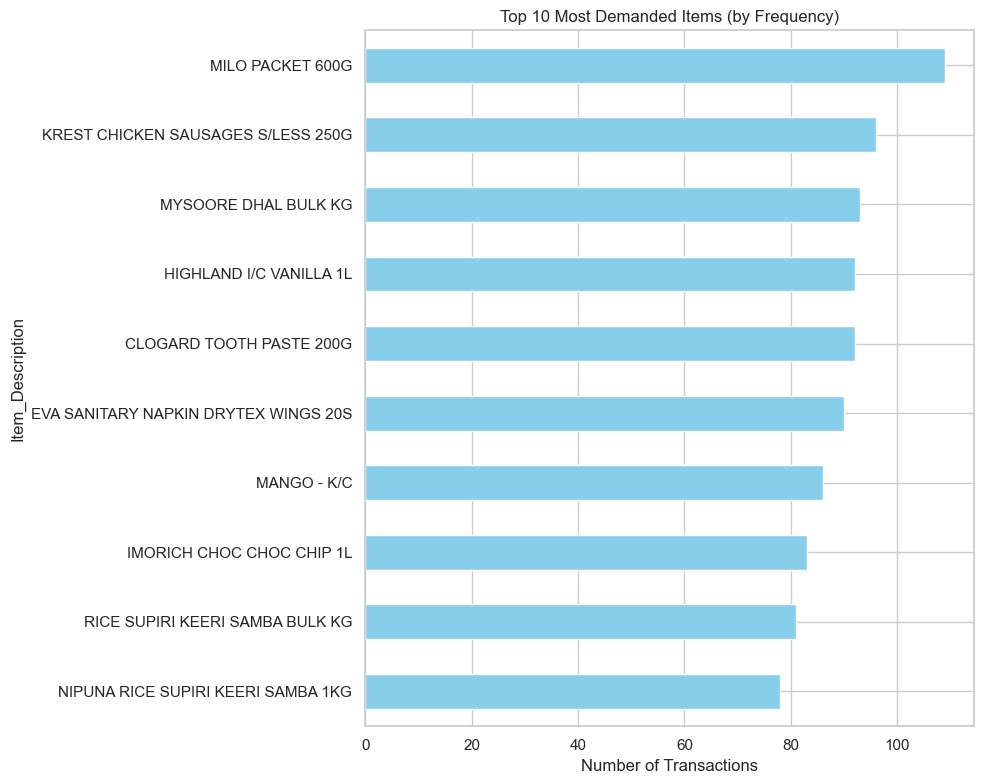

C:\Users\3C Tech\AppData\Local\Temp\ipykernel_19092\3415002024.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Outlet_Name', data=df, order=df['Outlet_Name'].value_counts().index, palette='viridis')


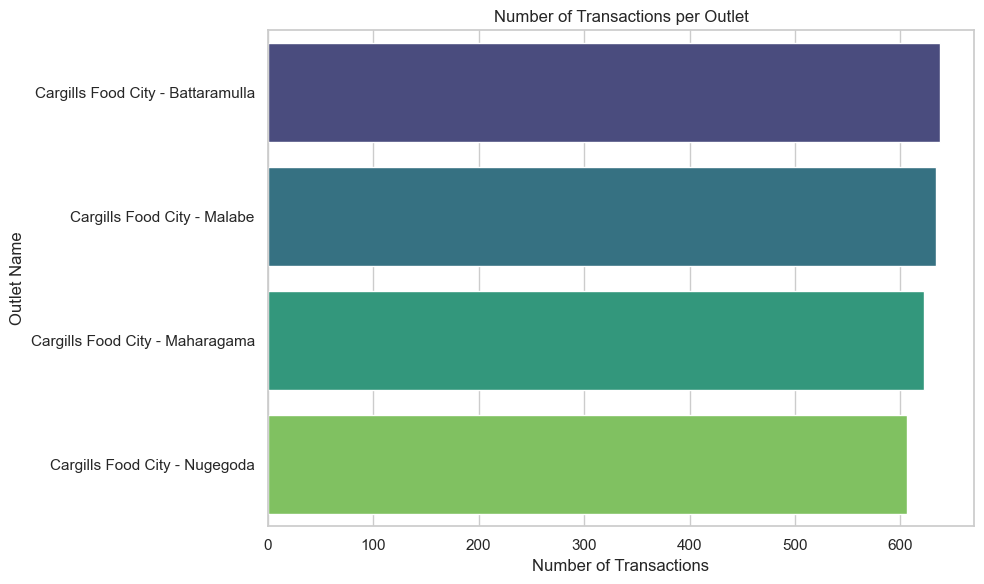

  - Generating time series plots...


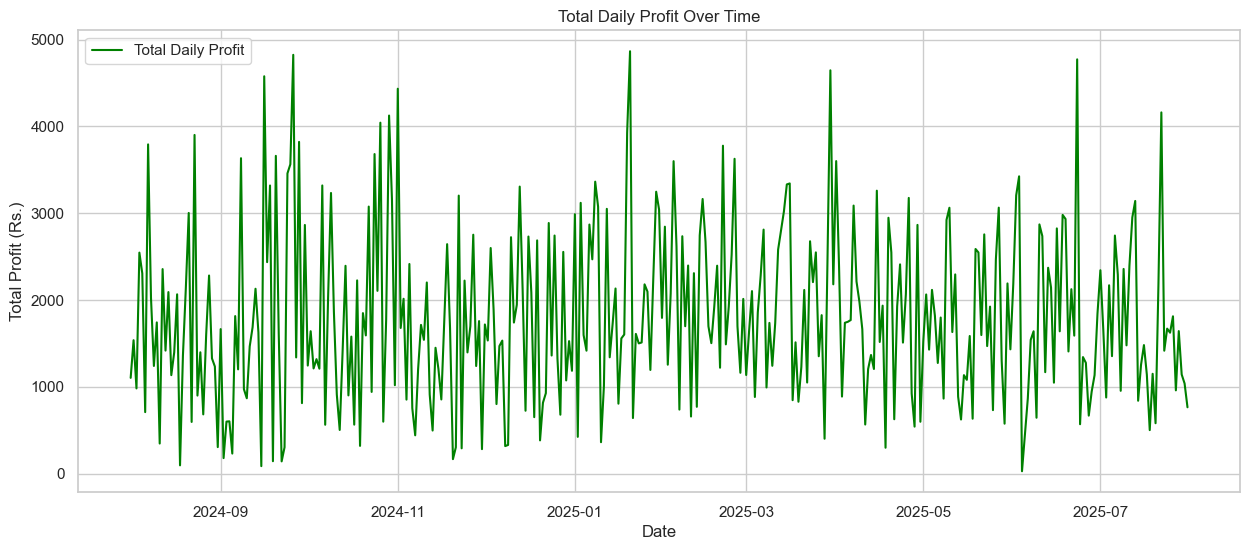

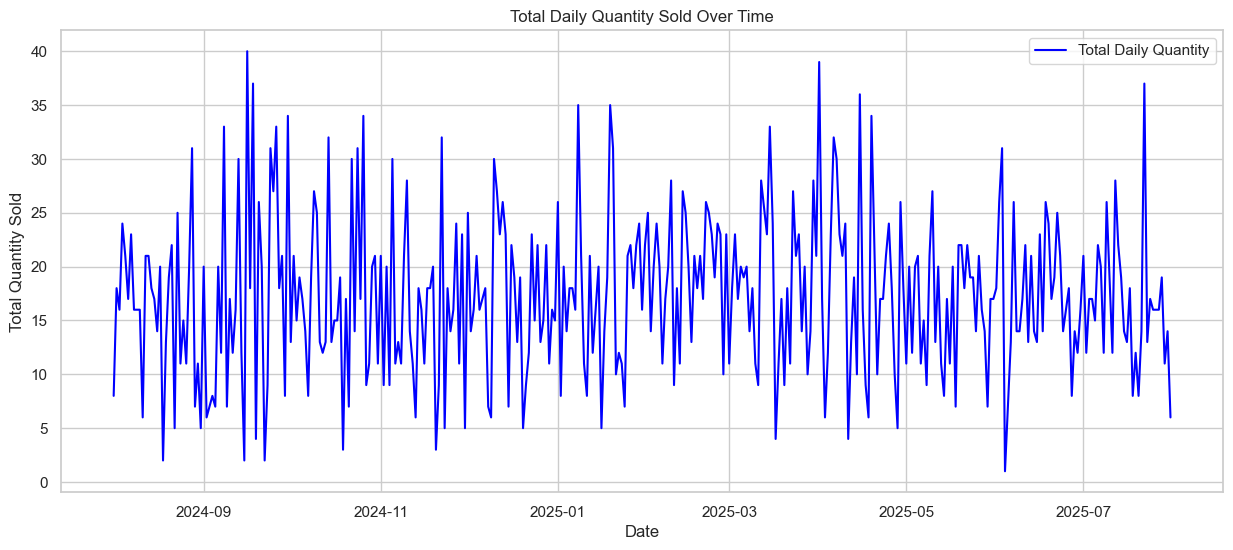


Data exploration and visualization complete!


In [83]:
print("\nData Visualization")
print("Generating and saving visualizations...")

# Set plot style
sns.set_style("whitegrid")

#Histograms for Numerical Data Distribution
print("  - Generating histograms...")
numerical_cols = ['Profit', 'TotalValue', 'Quantity', 'Unit_Price', 'Age', 'Discount']
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Column Distributions', y=1.02, size=16)
plt.show()

# Box Plots to Identify Outliers
print("  - Generating box plots...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.suptitle('Box Plots of Numerical Columns to Identify Outliers', y=1.02, size=16)
plt.tight_layout()
plt.show()


# Bar Charts for Categorical Data
print("  - Generating bar charts for categorical data...")
# Top 10 most frequent items
plt.figure(figsize=(10, 8))
df['Item_Description'].value_counts().nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Demanded Items (by Frequency)')
plt.xlabel('Number of Transactions')
plt.gca().invert_yaxis() # To display the highest count on top
plt.tight_layout()
plt.show()


# Sales by Outlet
plt.figure(figsize=(10, 6))
sns.countplot(y='Outlet_Name', data=df, order=df['Outlet_Name'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per Outlet')
plt.xlabel('Number of Transactions')
plt.ylabel('Outlet Name')
plt.tight_layout()
plt.show()


#Time Series Visualization
print("  - Generating time series plots...")
# Convert 'Date' column to datetime objects to enable time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate Profit and Quantity by Date
daily_data = df.groupby('Date').agg(Total_Profit=('Profit', 'sum'), Total_Quantity=('Quantity', 'sum')).reset_index()

# Plotting Daily Profit
plt.figure(figsize=(15, 6))
plt.plot(daily_data['Date'], daily_data['Total_Profit'], label='Total Daily Profit', color='green')
plt.title('Total Daily Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit (Rs.)')
plt.legend()
plt.show()


# Plotting Daily Quantity
plt.figure(figsize=(15, 6))
plt.plot(daily_data['Date'], daily_data['Total_Quantity'], label='Total Daily Quantity', color='blue')
plt.title('Total Daily Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

print("\nData exploration and visualization complete!")

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

**Data Preprocessing**

**Data Cleaning & Handling Missing Values**

In [85]:
# From our EDA, we know the only missing values are in 'NexusNumber',
# which is expected for non-members. We'll fill these NaNs with 0.
# This makes the column a complete numerical feature.
print("\n--- Cleaning Data ---")
df['NexusNumber'].fillna(0, inplace=True)
print("Missing 'NexusNumber' values filled with 0.")


--- Cleaning Data ---
Missing 'NexusNumber' values filled with 0.


C:\Users\3C Tech\AppData\Local\Temp\ipykernel_19092\2180712285.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NexusNumber'].fillna(0, inplace=True)


**Feature Engineering & Transformation**

In [86]:
print("\nPerforming Feature Engineering & Transformation")

# Date/Time Feature Engineering
# This is the most important step for time-series forecasting.
# We extract valuable information from the 'Date' column.
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
print("Created new time-based features: Year, Month, Day, DayOfWeek, WeekOfYear.")

# Binary Encoding for 'NexusMember'
# Converting 'Yes'/'No' to 1/0 is more efficient for models.
df['NexusMember'] = df['NexusMember'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Encoded 'NexusMember' to binary (1/0).")

# One-Hot Encoding for Categorical Features
# This converts categorical columns into a numerical format that models can understand.
# We select columns with a manageable number of unique categories.
categorical_cols_to_encode = ['Gender', 'Outlet_Name', 'Payment_Method', 'Department']
df = pd.get_dummies(df, columns=categorical_cols_to_encode, prefix=categorical_cols_to_encode)
print(f"Applied One-Hot Encoding to: {categorical_cols_to_encode}.")


Performing Feature Engineering & Transformation
Created new time-based features: Year, Month, Day, DayOfWeek, WeekOfYear.
Encoded 'NexusMember' to binary (1/0).
Applied One-Hot Encoding to: ['Gender', 'Outlet_Name', 'Payment_Method', 'Department'].


NOTE on 'Item_Description' and 'Item_Category':
We are NOT one-hot encoding these columns because they have too many unique values,
which would create hundreds of new columns (curse of dimensionality).
'Item_Description' will be used to group data for the demand forecasting task, not as a feature itself.

**Feature Reduction (Dropping Unnecessary Columns)**

In [87]:
print("\nPerforming Feature Reduction")
# We remove columns that are not useful for prediction to simplify the model.
columns_to_drop = [
    'Date',             # Information is now in Year, Month, Day, etc.
    'Time',             # Time of day might be useful, but for now we focus on daily/monthly trends.
    'Address',          # Redundant, as we have one-hot encoded 'Outlet_Name'.
    'InvoiceNumber',    # Just an identifier, no predictive value.
    'Item_Code',        # Also an identifier.
    'NexusNumber'       # Identifier; its presence is captured by 'NexusMember'.
]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped unnecessary columns: {columns_to_drop}")


Performing Feature Reduction
Dropped unnecessary columns: ['Date', 'Time', 'Address', 'InvoiceNumber', 'Item_Code', 'NexusNumber']


**Final Review and Saving the Cleaned Dataset**

In [88]:
print("\nPreprocessing Complete")
print("Final dataset is ready for modeling.")

# Display the final shape and first 5 rows of the preprocessed data
print(f"\nFinal Dataset Shape: {df.shape}")
print("\nFirst 5 Rows of the Preprocessed Dataset")
print(df.head())

# Display final data types to confirm all data is numerical
print("\nFinal Data Types")
print(df.info())

# Save the cleaned and preprocessed data to a new CSV file
output_filename = 'C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills_preprocessed_data.csv'
df.to_csv(output_filename, index=False)
print(f"\nSuccessfully saved the preprocessed data to '{output_filename}'")


Preprocessing Complete
Final dataset is ready for modeling.

Final Dataset Shape: (2500, 31)

First 5 Rows of the Preprocessed Dataset
   Age  NexusMember                       Item_Description     Item_Category  \
0   46            0          NESCAFE ICE COLD COFFEE 180ML     RTD Beverages   
1   55            1               CLOGARD TOOTH PASTE 200G         Oral Care   
2   34            0        Tiara Chocolate Layer Cake 310g             Cakes   
3   45            1     VELVET HAND WASH REFILL ROSE 200ML  Hand & Body Care   
4   25            1  BABY CHERAMY SOAP POKURUWA SADUN 5IN1        Baby Needs   

   Quantity  Unit_Price  Discount  TotalValue  Loyalty_Points_Earned  Profit  \
0         2       160.0        15      272.00                      0   93.53   
1         3       195.0         5      555.75                     19  104.12   
2         4       522.0         0     2088.00                     19  617.11   
3         3       175.0        10      472.50                  

**Data Mining & Machine Learning**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

**Load Preprocessed Data**

In [90]:
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills_preprocessed_data.csv')
print("Preprocessed dataset loaded successfully.")

Preprocessed dataset loaded successfully.


**Diagnosis and Correction**

In [91]:
# We will now explicitly drop any remaining non-numeric columns that are not the target variable.
# Identify all non-numeric columns (excluding the target 'Profit')
features_to_drop = []
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Profit':
        features_to_drop.append(col)

if features_to_drop:
    print(f"\nFound unexpected text columns: {features_to_drop}. Removing them before modeling.")
    df.drop(columns=features_to_drop, inplace=True)
else:
    print("\nNo unexpected text columns found. Proceeding with modeling.")


Found unexpected text columns: ['Item_Description', 'Item_Category']. Removing them before modeling.


**Prepare Data for Modeling**

In [92]:
print("\nPreparing Data for Modeling")

# Define the target variable (y) and features (X)
X = df.drop('Profit', axis=1)
y = df['Profit']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training ({X_train.shape[0]} rows) and testing ({X_test.shape[0]} rows) sets.")




Preparing Data for Modeling
Data split into training (2000 rows) and testing (500 rows) sets.


**Initialize and Train Models**

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("\nTraining Machine Learning Models")

# Algorithm 1: Random Forest Regressor
print("Training Random Forest Regressor")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("Random Forest training complete.")

# Algorithm 2: Gradient Boosting Regressor
print("Training Gradient Boosting Regressor")
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
gbr_model.fit(X_train, y_train)
print("Gradient Boosting training complete.")


Training Machine Learning Models
Training Random Forest Regressor
Random Forest training complete.
Training Gradient Boosting Regressor
Gradient Boosting training complete.


**Make Predictions on the Test Set**

In [94]:
print("\nMaking Predictions")
rf_preds = rf_model.predict(X_test)
gbr_preds = gbr_model.predict(X_test)
print("Predictions made on the test set for both models.")


Making Predictions
Predictions made on the test set for both models.


**Evaluate Models**

In [95]:
print("\nEvaluating Model Performance")

rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)

gbr_r2 = r2_score(y_test, gbr_preds)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_preds))
gbr_mae = mean_absolute_error(y_test, gbr_preds)

print("\nModel Evaluation Results")
print("Metric              | Random Forest | Gradient Boosting")
print("--------------------|---------------|-------------------")
print(f"R² (R-squared)      | {rf_r2:13.4f} | {gbr_r2:17.4f}")
print(f"RMSE (Rs.)          | {rf_rmse:13.2f} | {gbr_rmse:17.2f}")
print(f"MAE (Rs.)           | {rf_mae:13.2f} | {gbr_mae:17.2f}")


Evaluating Model Performance

Model Evaluation Results
Metric              | Random Forest | Gradient Boosting
--------------------|---------------|-------------------
R² (R-squared)      |        0.8853 |            0.8866
RMSE (Rs.)          |         83.53 |             83.08
MAE (Rs.)           |         53.65 |             52.80


**Visualize Results**


Visualizing Results


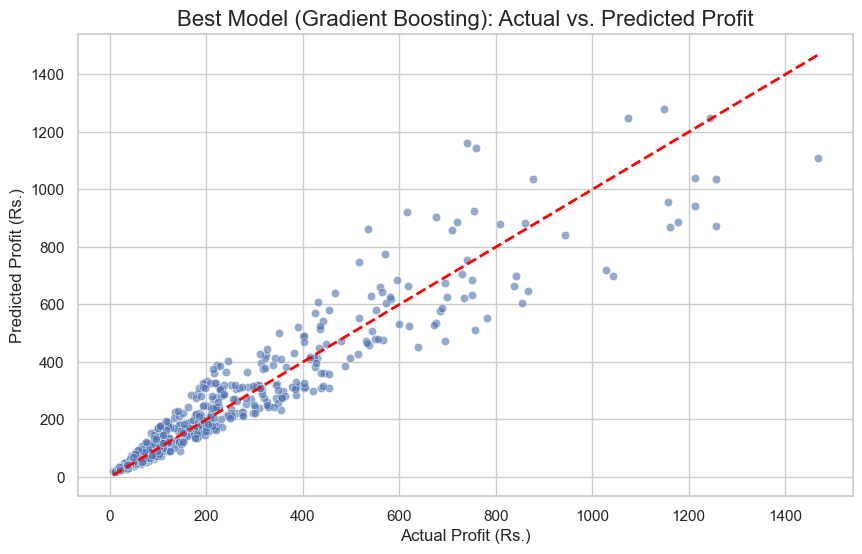

Actual vs. Predicted plot saved for the best model.


In [96]:
print("\nVisualizing Results")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gbr_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', lw=2)
plt.title('Best Model (Gradient Boosting): Actual vs. Predicted Profit', fontsize=16)
plt.xlabel('Actual Profit (Rs.)')
plt.ylabel('Predicted Profit (Rs.)')
plt.show()
print("Actual vs. Predicted plot saved for the best model.")

**Model Selection and Feature Importance**

In [97]:
print("\nModel Selection")

if gbr_r2 > rf_r2 and gbr_rmse < rf_rmse:
    best_model = gbr_model
    best_model_name = "Gradient Boosting"
else:
    best_model = rf_model
    best_model_name = "Random Forest"
print(f"The best performing model is: **{best_model_name}**")

importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).nlargest(15, 'importance')


Model Selection
The best performing model is: **Gradient Boosting**


C:\Users\3C Tech\AppData\Local\Temp\ipykernel_19092\2017991794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


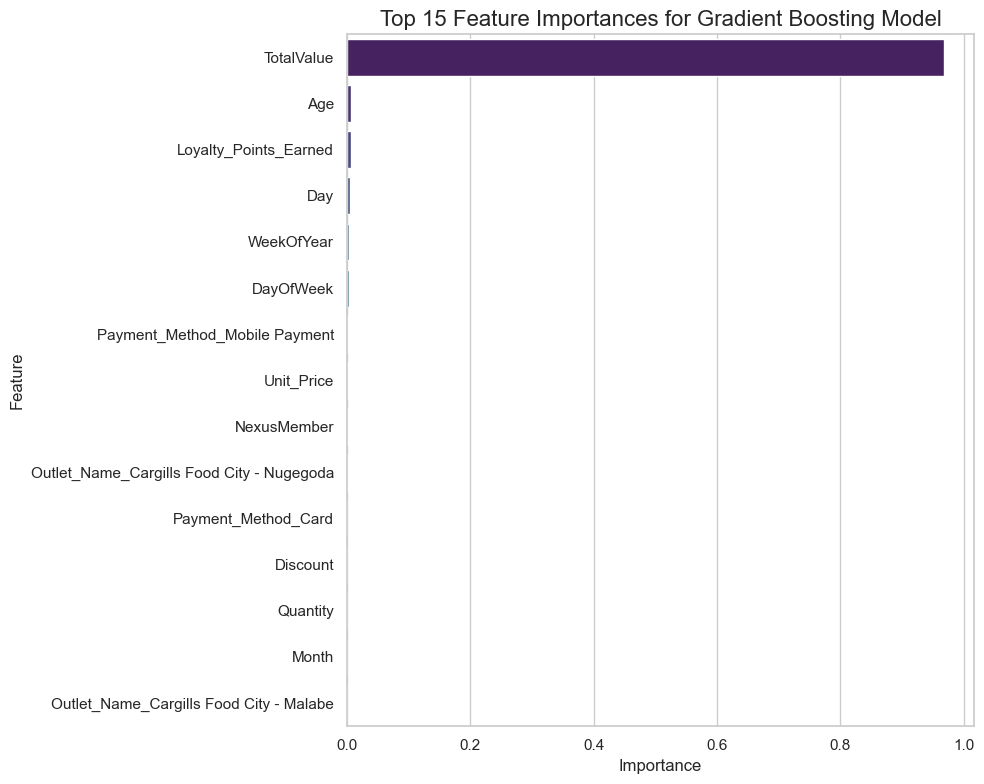

Feature importance plot.


In [98]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title(f'Top 15 Feature Importances for {best_model_name} Model', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Feature importance plot.")

**Save the Best Model**

In [99]:
import pickle

# Define the filename for the pickle file
pkl_filename = 'best_profit_model.pkl'

# save the model
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model has been saved as a pickle file: '{pkl_filename}'")

Best model has been saved as a pickle file: 'best_profit_model.pkl'


## ------------------------------------------------------------------------------------------------

# ***Model 2 - Identify Potential Loyalty Members***

### *Goal:* Predict whether a customer is a NexusMember ('Yes' or 'No') based on their purchasing behavior.

### *Why it's useful:* This model can identify customers who act like loyalty members (e.g., spend a lot, buy frequently) but haven't signed up yet. The supermarket can then target these specific customers with promotions to join the Nexus program.

### *Model Type:* This is a Classification task, as we are predicting a category, not a number.

**Import libraries**

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve

**Load and Prepare data**

In [101]:
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills.csv')
print("Original dataset loaded successfully.")

Original dataset loaded successfully.


**Visualization of data**

1. Generating Box Plot: Transaction Value by Membership...


C:\Users\3C Tech\AppData\Local\Temp\ipykernel_19092\3171460779.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NexusMember', y='TotalValue', palette='pastel')


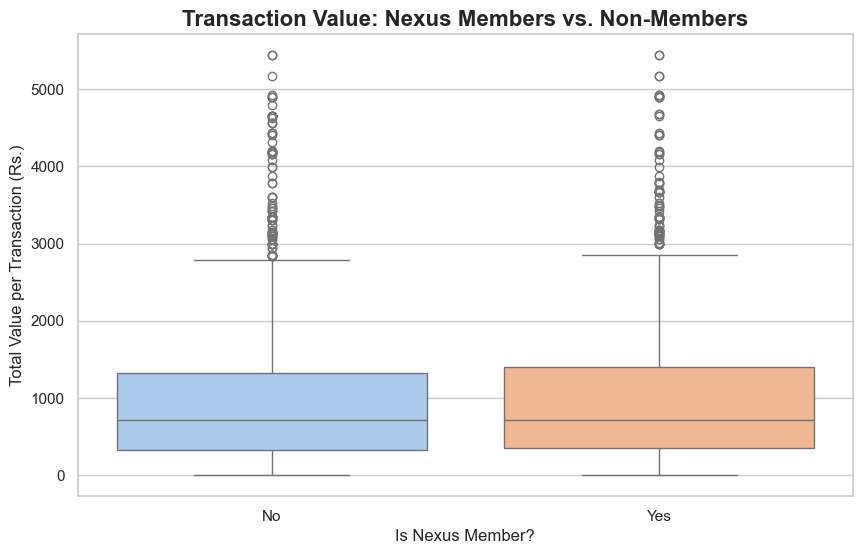

2. Generating KDE Plot: Age Distribution by Membership...


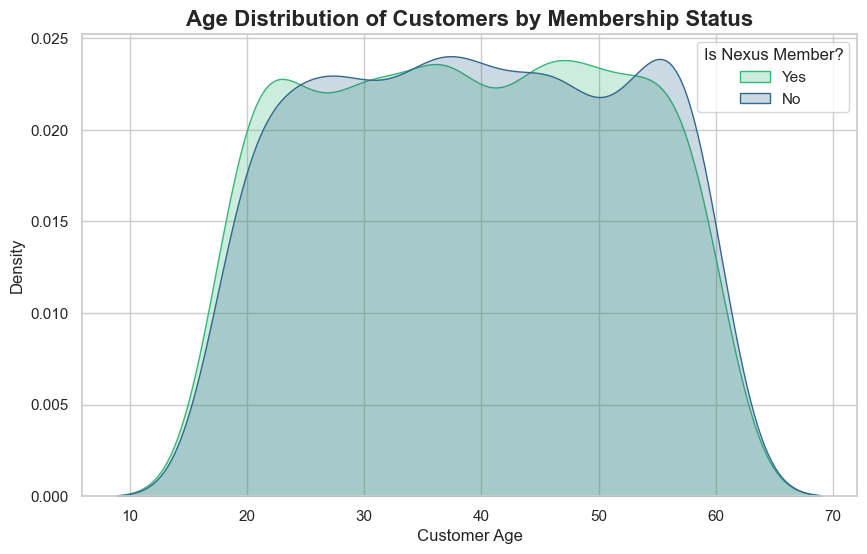

3. Generating Bar Chart: Payment Method by Membership...


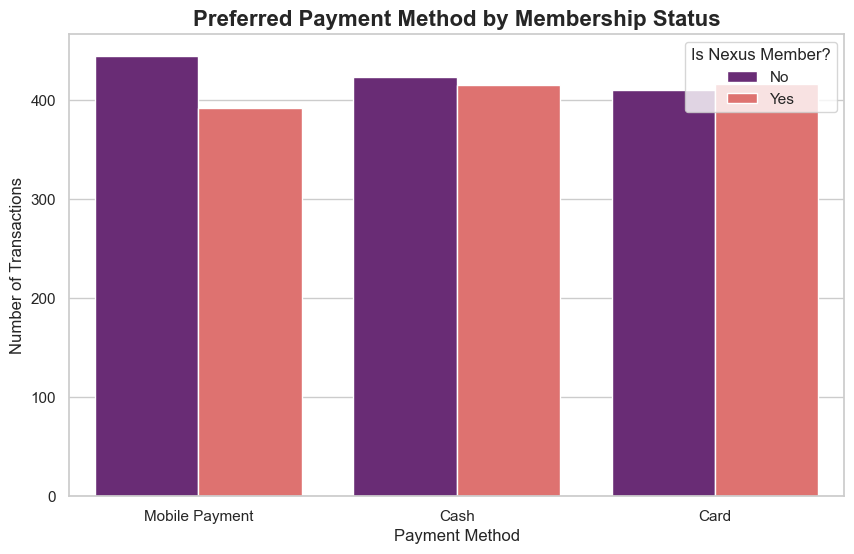

4. Generating Heatmap: Department Visits by Membership...


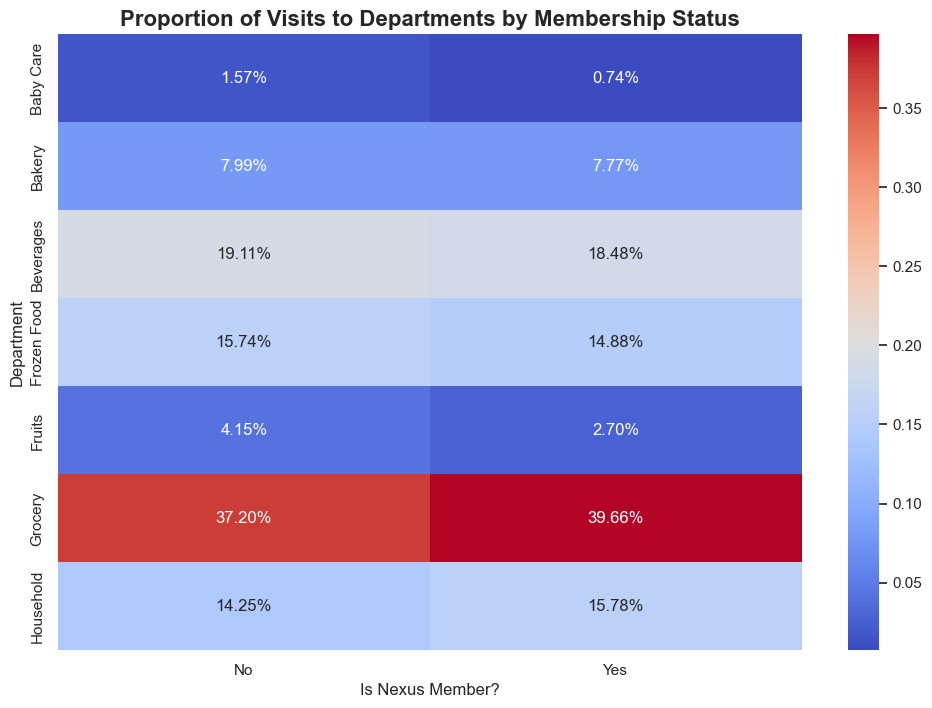

In [102]:
# Set a consistent, professional plot style
sns.set_theme(style="whitegrid")

# Transaction Value by Membership Status
print("1. Generating Box Plot: Transaction Value by Membership...")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='NexusMember', y='TotalValue', palette='pastel')
plt.title('Transaction Value: Nexus Members vs. Non-Members', fontsize=16, weight='bold')
plt.xlabel('Is Nexus Member?', fontsize=12)
plt.ylabel('Total Value per Transaction (Rs.)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Age Distribution by Membership Status
print("2. Generating KDE Plot: Age Distribution by Membership...")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='NexusMember', fill=True, common_norm=False, palette='viridis')
plt.title('Age Distribution of Customers by Membership Status', fontsize=16, weight='bold')
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Is Nexus Member?', labels=['Yes', 'No'])
plt.show()

# Preferred Payment Method by Membership Status
print("3. Generating Bar Chart: Payment Method by Membership...")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Method', hue='NexusMember', palette='magma')
plt.title('Preferred Payment Method by Membership Status', fontsize=16, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Is Nexus Member?', labels=['No', 'Yes'])
plt.show()

# Department Visits by Membership Status
print("4. Generating Heatmap: Department Visits by Membership...")
# Create a pivot table to count visits
dept_visits = df.groupby(['Department', 'NexusMember']).size().unstack(fill_value=0)
# Normalize the data to see the proportion of visits within each group
dept_visits_normalized = dept_visits.div(dept_visits.sum(axis=0), axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(dept_visits_normalized, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Proportion of Visits to Departments by Membership Status', fontsize=16, weight='bold')
plt.xlabel('Is Nexus Member?', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.show()

**Feature Engineering and Data Preprocessing.**

In [103]:
# Feature Engineering, Preprocessing, and Data Splitting

print("\n1. Starting Advanced Feature Engineering...")

# Convert Date and Time to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Create new features from original dataframe
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['TimeOfDay_Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

original_total = (df['Quantity'] * df['Unit_Price'])
df['DiscountRate'] = np.where(original_total > 0, (df['Discount'] / original_total) * 100, 0)
df['PricePerUnit'] = df['Unit_Price'] # Rename for clarity
print(" - Created all new features.")

# Select all features for the model, including the new ones
features = [
    'Age', 'Gender', 'Department', 'Payment_Method', 'Quantity',
    'Discount', 'TotalValue', 'DayOfWeek', 'Month', 'TimeOfDay_Hour',
    'IsWeekend', 'DiscountRate', 'PricePerUnit'
]
target = 'NexusMember'

df_loyalty = df[features + [target]].copy()
df_loyalty.dropna(subset=[target], inplace=True)

print("\n2. Starting Data Preprocessing...")

# Map target variable BEFORE processing features
df_loyalty[target] = df_loyalty[target].map({'Yes': 1, 'No': 0})

# One-hot encode ALL categorical features
categorical_cols = ['Gender', 'Department', 'Payment_Method', 'DayOfWeek', 'Month']
df_loyalty = pd.get_dummies(df_loyalty, columns=categorical_cols, drop_first=True)
print(" - One-hot encoded categorical features.")

# Handle Outliers in ALL numerical columns
numerical_cols = ['Age', 'Quantity', 'Discount', 'TotalValue', 'TimeOfDay_Hour',
                  'DiscountRate', 'PricePerUnit']
for col in numerical_cols:
    Q1 = df_loyalty[col].quantile(0.25)
    Q3 = df_loyalty[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_loyalty[col] = np.where(df_loyalty[col] < lower_bound, lower_bound, df_loyalty[col])
    df_loyalty[col] = np.where(df_loyalty[col] > upper_bound, upper_bound, df_loyalty[col])
print(" - Handled outliers by capping extreme values.")

print("\n3. Defining Features (X) and Target (y) and Splitting Data...")

X = df_loyalty.drop(target, axis=1)
y = df_loyalty[target]

# We will let the tree-based models (Random Forest, XGBoost) handle feature importance internally.
# This is a more effective approach with all our new features.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f" - Data split into training and testing sets.")
print(f" - Shape of X_train: {X_train.shape}")


## Scaling Numerical Features
# This section now works correctly because X_train and X_test are defined properly
print("\nScaling Numerical Features")
scaler = StandardScaler()

# Identify only the columns that are numerical in the final training set
numerical_features_final = X_train.select_dtypes(include=np.number).columns.tolist()

X_train[numerical_features_final] = scaler.fit_transform(X_train[numerical_features_final])
X_test[numerical_features_final] = scaler.transform(X_test[numerical_features_final])
print("Training and testing data have been scaled.")


1. Starting Advanced Feature Engineering...
 - Created all new features.

2. Starting Data Preprocessing...
 - One-hot encoded categorical features.
 - Handled outliers by capping extreme values.

3. Defining Features (X) and Target (y) and Splitting Data...
 - Data split into training and testing sets.
 - Shape of X_train: (2000, 34)

Scaling Numerical Features
Training and testing data have been scaled.


C:\Users\3C Tech\AppData\Local\Temp\ipykernel_19092\682813662.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeOfDay_Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour


**Feature Selection & Data Splitting**

In [104]:
print("\nFeature Selection and Data Splitting")
X = df_loyalty.drop(target, axis=1)
y = df_loyalty[target]


Feature Selection and Data Splitting


**Scaling Numerical Features**

In [105]:
print("\nScaling Numerical Features")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training and testing data have been scaled.")


Scaling Numerical Features
Training and testing data have been scaled.


**Data Mining & Machine Learning (with Cross-Validation and Tuning)**

In [106]:
## ---------------------------------------------------------------------------------
## NEW: Data Mining & Machine Learning (with Imbalance Handling & Better Tuning)
## ---------------------------------------------------------------------------------
print("\nModel Training with Hyperparameter Tuning and Imbalance Handling")

# --- Address Class Imbalance ---
# For XGBoost, we calculate scale_pos_weight
# It's the ratio of negative class to positive class
y_train_counts = y_train.value_counts()
scale_pos_weight_value = y_train_counts[0] / y_train_counts[1]
print(f" - Calculated 'scale_pos_weight' for XGBoost: {scale_pos_weight_value:.2f}")


# --- EXPANDED: Define models and a wider parameter grid for tuning ---
models_and_params = {
    'LogisticRegression': (LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'), {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'] # Add more solvers
    }),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42, class_weight='balanced'), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [1, 5, 10] # Helps prevent overfitting
    }),
    'XGBClassifier': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [5, 10, 15]
    })
}

best_models = {}
# Hyperparameter Tuning using GridSearchCV with Cross-Validation
# NOTE: Using 'f1' as the scoring metric is often better for imbalanced datasets
for name, (model, params) in models_and_params.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1-Score from CV: {grid_search.best_score_:.4f}\n")


Model Training with Hyperparameter Tuning and Imbalance Handling
 - Calculated 'scale_pos_weight' for XGBoost: 1.04
Tuning LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for LogisticRegression: {'C': 10, 'solver': 'liblinear'}
Best F1-Score from CV: 0.5229

Tuning RandomForestClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForestClassifier: {'max_depth': 30, 'min_samples_leaf': 10, 'n_estimators': 200}
Best F1-Score from CV: 0.5157

Tuning XGBClassifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\3C Tech\.conda\envs\ml-exercise\lib\site-packages\xgboost\training.py:183: UserWarning: [23:48:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Best F1-Score from CV: 0.5333



**Evaluation & Interpretation**

In [107]:
print("\nFinal Model Evaluation")

results = []
for name, model in best_models.items():
    preds = model.predict(X_test_scaled)
    probs = model.predict_proba(X_test_scaled)[:, 1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds),
        'Recall': recall_score(y_test, preds),
        'F1-Score': f1_score(y_test, preds),
        'ROC AUC': roc_auc_score(y_test, probs)
    })

results_df = pd.DataFrame(results).set_index('Model')
print("\nModel Evaluation Results")
print(results_df)


Final Model Evaluation

Model Evaluation Results
                        Accuracy  Precision    Recall  F1-Score   ROC AUC
Model                                                                    
LogisticRegression         0.552   0.543933  0.530612  0.537190  0.552957
RandomForestClassifier     0.518   0.507874  0.526531  0.517034  0.502633
XGBClassifier              0.508   0.497872  0.477551  0.487500  0.503193


In [108]:
# Select best model based on Precision
best_model_name = results_df['Precision'].idxmax()
best_model = best_models[best_model_name]
print(f"\nBest performing model based on Precision: **{best_model_name}**")


Best performing model based on Precision: **LogisticRegression**


**Visualization**


Visualizing Final Model Performance


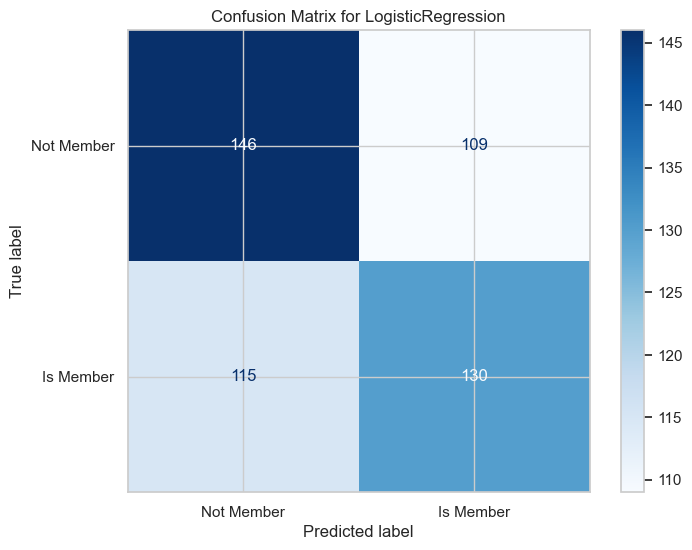

In [109]:
print("\nVisualizing Final Model Performance")
best_preds = best_model.predict(X_test_scaled)
best_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, best_preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Member', 'Is Member'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

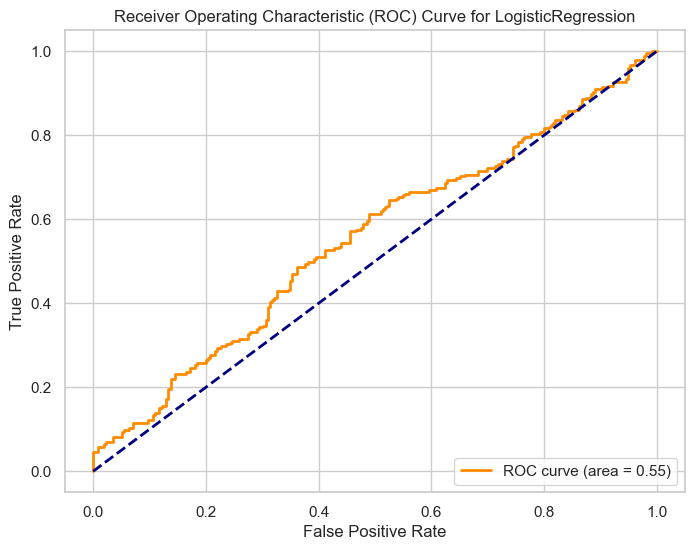

In [110]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, best_probs):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for {best_model_name}')
plt.legend(loc="lower right")
plt.show()


Interpreting Feature Importance for the Best Model...
Displaying feature coefficients for LogisticRegression...


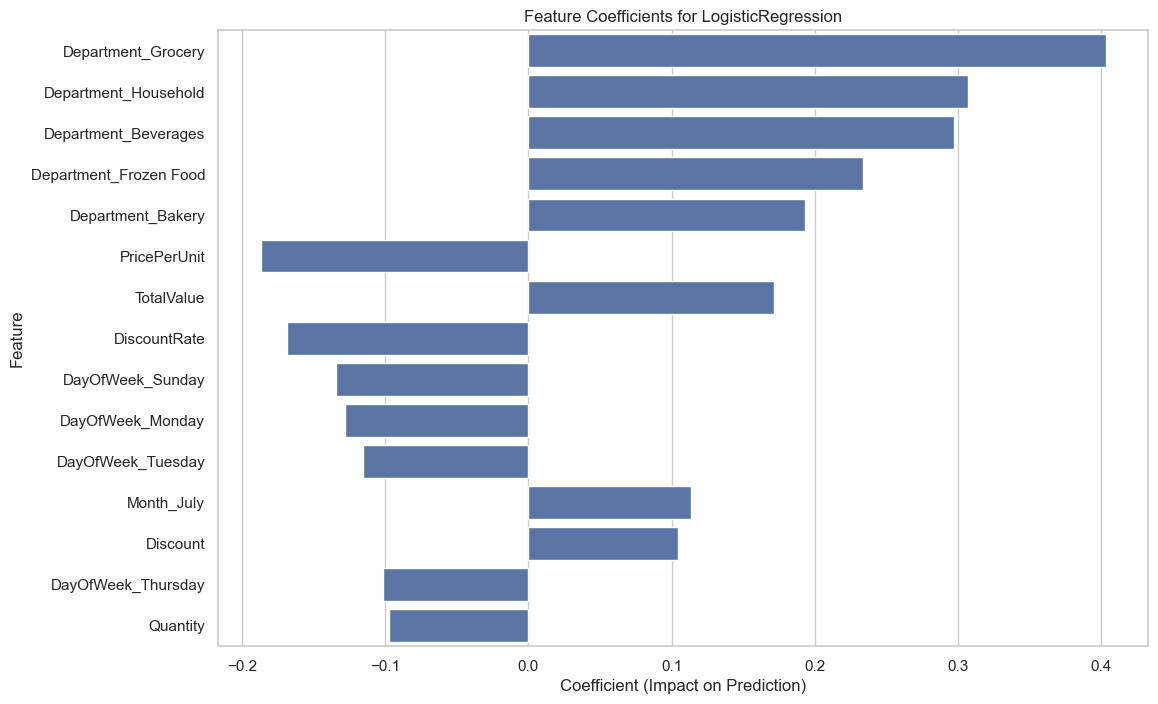

In [126]:
print("\nInterpreting Feature Importance for the Best Model...")

# Case 1: The best model is tree-based (Random Forest or XGBoost)
if hasattr(best_model, 'feature_importances_'):
    print(f"Displaying feature importances for {best_model_name}...")
    importances = best_model.feature_importances_
    # Use X_train.columns because it has the final feature names after one-hot encoding
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15)) # Show top 15
    plt.title(f'Feature Importance for {best_model_name}')
    plt.show()

# Case 2: The best model is Logistic Regression
elif hasattr(best_model, 'coef_'):
    print(f"Displaying feature coefficients for {best_model_name}...")
    # The .coef_ attribute gives the importance (positive or negative)
    coefficients = best_model.coef_[0]
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
    
    # Take the absolute value for ranking, but keep original for plotting
    feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
    feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df.head(15)) # Show top 15
    plt.title(f'Feature Coefficients for {best_model_name}')
    plt.xlabel('Coefficient (Impact on Prediction)')
    plt.show()

else:
    print(f"Feature importance plotting is not set up for {best_model_name}.")

In [112]:
#Save the Best Model and Scaler ---
print("\nSaving the Best Loyalty Model and Scaler")
model_filename = 'best_loyalty_model_advanced.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model ({best_model_name}) has been saved to '{model_filename}'")

scaler_filename = 'loyalty_model_scaler_advanced.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler has been saved to '{scaler_filename}'")


Saving the Best Loyalty Model and Scaler
Best model (LogisticRegression) has been saved to 'best_loyalty_model_advanced.pkl'
Scaler has been saved to 'loyalty_model_scaler_advanced.pkl'


## ------------------------------------------------------------------------------------------------

# ***Predicting the Most Demanded Items and Categories.***
This is a different kind of problem than predicting a single profit number. Instead of training one model to predict a single value, a more effective approach here is to perform a time-series analysis and trend identification for each item. This will show us which products are not only popular overall but also which ones are trending upwards.

*Our strategy will be:*

* Aggregate Sales Data: Calculate the total quantity sold for each item on a weekly basis.

* Identify Top Performers: Find the top-selling items based on their total sales volume over the entire period.

* Visualize Trends: Plot the weekly sales of these top items to visually inspect their demand over time.

* Calculate Trend Score: For every item, we'll calculate a simple "trend score" to mathematically determine if its sales are generally increasing, decreasing, or stable.

* Present a Final Ranking: Combine overall popularity with the trend score to create a final report on which items will likely be most in demand.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

**Load Original Data**

In [114]:
print("Loading Original Dataset")
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills.csv')
print("Original dataset loaded successfully.")

Loading Original Dataset
Original dataset loaded successfully.


**Aggregate Data for Demand Analysis**

In [115]:
print("\nAggregating Data by Week")

# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time-based resampling
df.set_index('Date', inplace=True)

# Resample data to get the sum of 'Quantity' sold for each item every week
weekly_demand = df.groupby('Item_Description').resample('W').agg(Total_Quantity=('Quantity', 'sum')).reset_index()
print("Calculated total weekly quantity for each item.")


Aggregating Data by Week
Calculated total weekly quantity for each item.


C:\Users\3C Tech\AppData\Local\Temp\ipykernel_19092\1413149669.py:10: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_demand = df.groupby('Item_Description').resample('W').agg(Total_Quantity=('Quantity', 'sum')).reset_index()


**Identify Top Selling Items & Visualize Trends**


Visualizing Sales Trends of Top Items


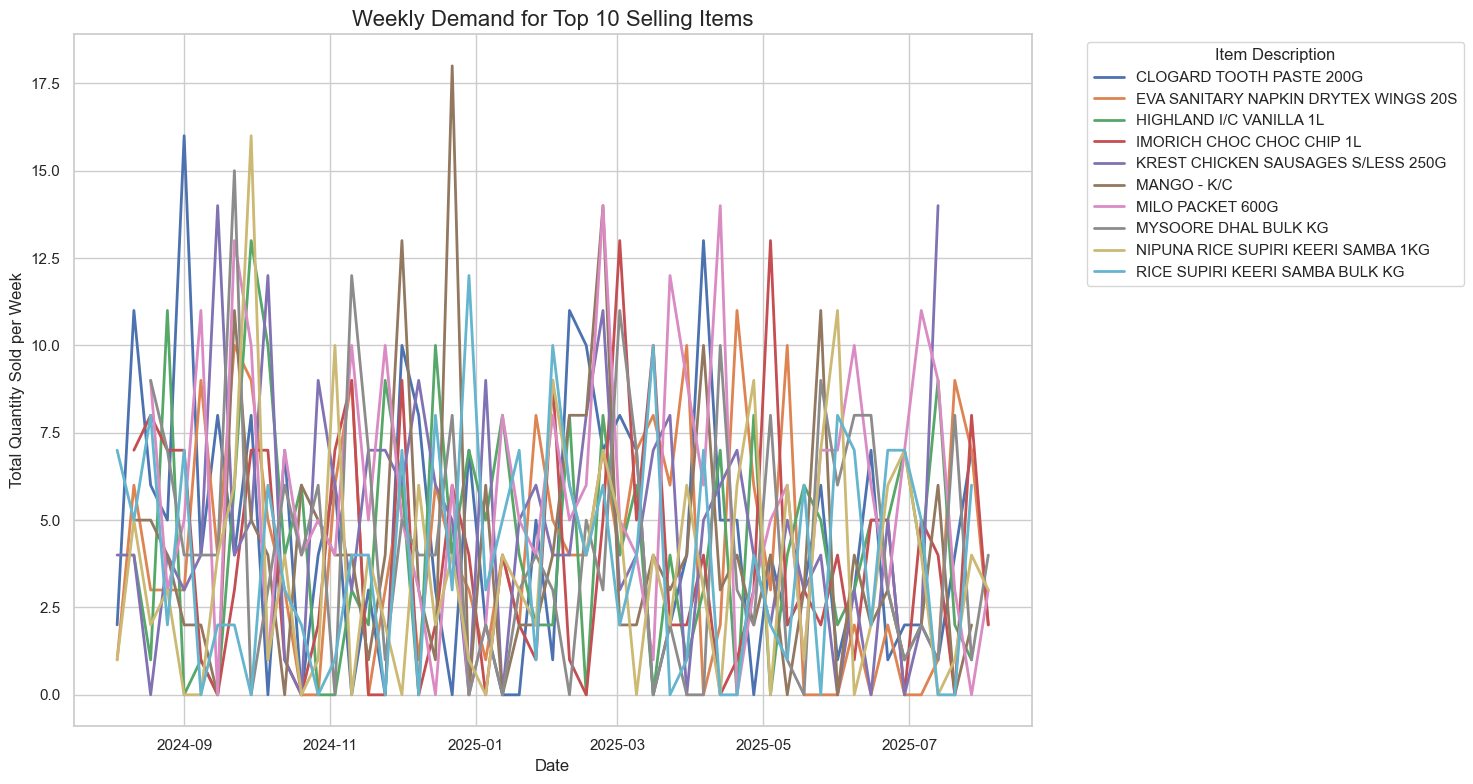

In [116]:
print("\nVisualizing Sales Trends of Top Items")

# Find the top 10 items by total quantity sold
total_demand = weekly_demand.groupby('Item_Description')['Total_Quantity'].sum().sort_values(ascending=False)
top_10_items = total_demand.head(10).index

# Filter the weekly data to only include the top 10 items
top_10_demand_weekly = weekly_demand[weekly_demand['Item_Description'].isin(top_10_items)]

# Create the time-series plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_10_demand_weekly, x='Date', y='Total_Quantity', hue='Item_Description', lw=2)
plt.title('Weekly Demand for Top 10 Selling Items', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold per Week')
plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Calculate a "Trend Score" for Every Item**

In [117]:
print("\nCalculating Trend Score for All Items")

trend_data = []
# Loop through each unique item
for item in weekly_demand['Item_Description'].unique():
    item_df = weekly_demand[weekly_demand['Item_Description'] == item].copy()
    
    # Ensure there are at least two data points to calculate a trend
    if len(item_df) < 2:
        continue
        
    # Create a numerical time index (0, 1, 2, ...) for the linear regression
    item_df['time_index'] = np.arange(len(item_df))
    
    # Use scipy's linregress to get the slope of the sales trend
    # The slope is our "Trend Score"
    slope, intercept, r_value, p_value, std_err = linregress(item_df['time_index'], item_df['Total_Quantity'])
    
    # Get total and average quantity
    total_qty = item_df['Total_Quantity'].sum()
    avg_weekly_qty = item_df['Total_Quantity'].mean()
    
    trend_data.append({
        'Item_Description': item,
        'Total_Quantity_Sold': total_qty,
        'Avg_Weekly_Quantity': avg_weekly_qty,
        'Trend_Score': slope
    })

# Create a final summary DataFrame
summary_df = pd.DataFrame(trend_data)
# Sort by total quantity sold to see the most popular items first
summary_df = summary_df.sort_values(by='Total_Quantity_Sold', ascending=False)

print("Trend scores calculated successfully.")


Calculating Trend Score for All Items
Trend scores calculated successfully.


**Present Final Rankings**

In [118]:
print("\nFinal Demand Prediction Summary")
print("This table shows the most popular items and their sales trend.")
print("A positive 'Trend_Score' indicates growing demand, while a negative score indicates declining demand.")

print(summary_df.head(15).to_string())


Final Demand Prediction Summary
This table shows the most popular items and their sales trend.
A positive 'Trend_Score' indicates growing demand, while a negative score indicates declining demand.
                        Item_Description  Total_Quantity_Sold  Avg_Weekly_Quantity  Trend_Score
26                      MILO PACKET 600G                  295             5.784314    -0.008959
21    KREST CHICKEN SAUSAGES S/LESS 250G                  242             4.840000    -0.023818
7               CLOGARD TOOTH PASTE 200G                  235             4.519231    -0.049048
18               HIGHLAND I/C VANILLA 1L                  220             4.313725    -0.011222
12  EVA SANITARY NAPKIN DRYTEX WINGS 20S                  219             4.132075    -0.027092
27                  MYSOORE DHAL BULK KG                  218             4.274510    -0.038643
25                           MANGO - K/C                  213             4.176471    -0.030950
35       RICE SUPIRI KEERI SAMBA B

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

print("Starting Demand Forecasting Analysis")

Starting Demand Forecasting Analysis


**Load Original Data**

In [120]:
# We must use the original dataset to have access to Item_Description.
df = pd.read_csv('C:/Users/3C Tech/Desktop/supermarket smart managment sytem/dataset/cargills.csv')
print("Original dataset loaded successfully.")

Original dataset loaded successfully.


**Correctly Prepare Data for Time-Series Analysis**

In [121]:
# First, ensure the 'Date' column is in datetime format.
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame.
# The .resample() method works most naturally on a DatetimeIndex.
df.set_index('Date', inplace=True)
print("'Date' column has been set as the DataFrame index.")

'Date' column has been set as the DataFrame index.


**Aggregate Data by Week**

In [122]:
# group by item and resample by week ('W').
print("\nAggregating sales data to a weekly level...")
weekly_sales = df.groupby('Item_Description').resample('W')['Quantity'].sum().reset_index()
weekly_sales = weekly_sales[weekly_sales['Quantity'] > 0] # Keep only weeks with sales


Aggregating sales data to a weekly level...


**Identify and Visualize Top Seller Trends**

Identifying and visualizing top 10 items...


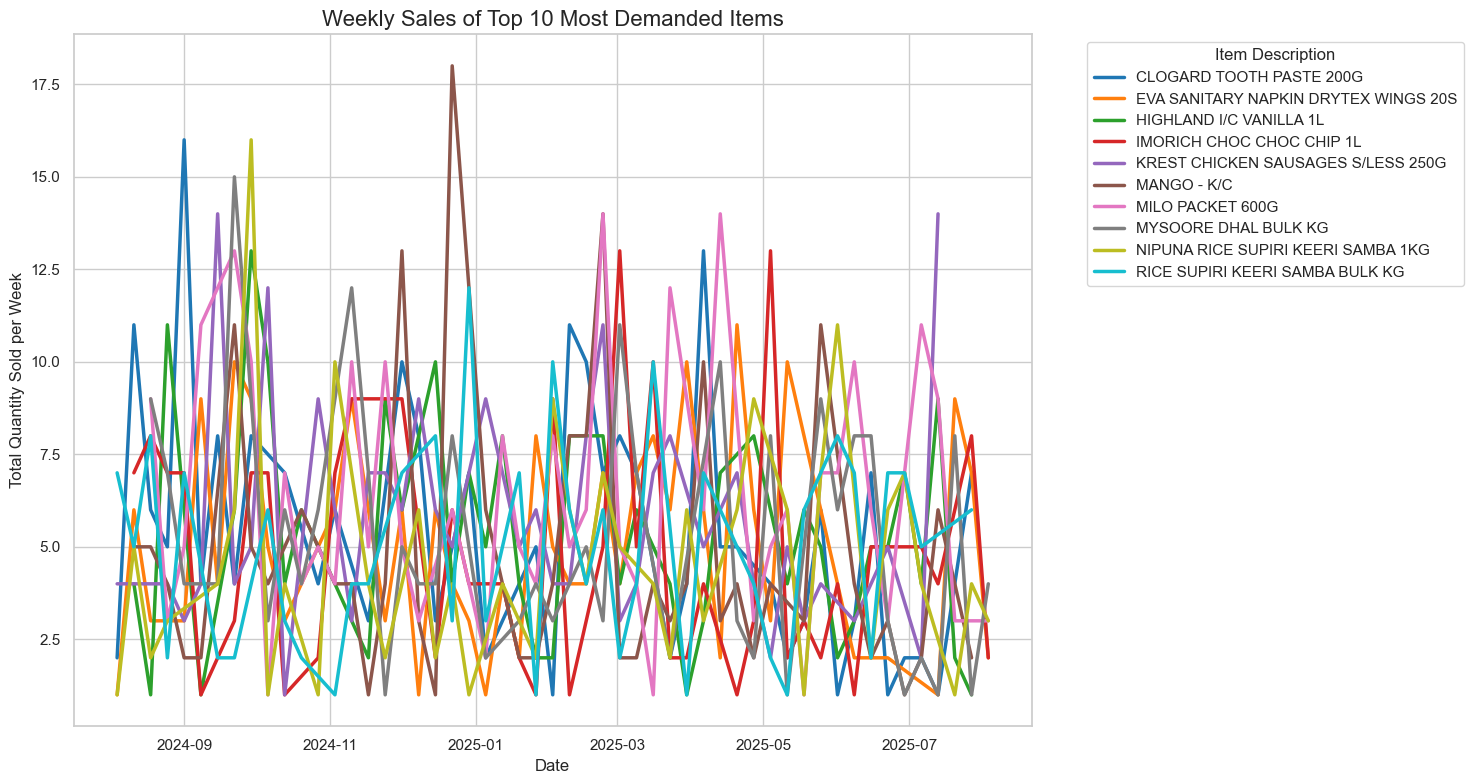

In [123]:
print("Identifying and visualizing top 10 items...")
total_sales = df.groupby('Item_Description')['Quantity'].sum().sort_values(ascending=False)
top_10_items = total_sales.nlargest(10).index

plt.figure(figsize=(15, 8))
top_items_weekly_sales = weekly_sales[weekly_sales['Item_Description'].isin(top_10_items)]
sns.lineplot(
    data=top_items_weekly_sales,
    x='Date',
    y='Quantity',
    hue='Item_Description',
    palette='tab10',
    linewidth=2.5
)
plt.title('Weekly Sales of Top 10 Most Demanded Items', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold per Week')
plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Calculate Trend Score for ALL Items**

In [124]:
# calculate the slope of a linear regression line for each item's sales over time.
# A positive slope means an upward trend.
print("\nCalculating a 'Trend Score' for every item")
trend_data = []
all_items = weekly_sales['Item_Description'].unique()

for item in all_items:
    item_sales = weekly_sales[weekly_sales['Item_Description'] == item].copy()
    
    # need at least 3 data points to calculate a meaningful trend
    if len(item_sales) >= 3:
        # Create a numerical time index (0, 1, 2, ...)
        item_sales['time_index'] = np.arange(len(item_sales))
        
        # Perform linear regression to find the slope (trend)
        slope, intercept, r_value, p_value, std_err = linregress(item_sales['time_index'], item_sales['Quantity'])
        
        trend_data.append({
            'Item_Description': item,
            'Total_Quantity_Sold': total_sales.loc[item],
            'Trend_Score (Slope)': slope
        })

# Create a DataFrame from the trend analysis
trend_df = pd.DataFrame(trend_data)
trend_df = trend_df.sort_values(by='Total_Quantity_Sold', ascending=False)
trend_df['Trend_Score (Slope)'] = trend_df['Trend_Score (Slope)'].round(4)




Calculating a 'Trend Score' for every item


**Present Final Rankings**

In [125]:
print("\nDemand Forecasting Summary")
print("The following table shows the overall most popular items and their sales trend.")
print("A positive 'Trend_Score' indicates growing demand.\n")

# Displaying the top 20 items for a more comprehensive view
print(trend_df.head(20))

print("\nAnalysis complete.")


Demand Forecasting Summary
The following table shows the overall most popular items and their sales trend.
A positive 'Trend_Score' indicates growing demand.

                          Item_Description  Total_Quantity_Sold  \
26                        MILO PACKET 600G                  295   
21      KREST CHICKEN SAUSAGES S/LESS 250G                  242   
7                 CLOGARD TOOTH PASTE 200G                  235   
18                 HIGHLAND I/C VANILLA 1L                  220   
12    EVA SANITARY NAPKIN DRYTEX WINGS 20S                  219   
27                    MYSOORE DHAL BULK KG                  218   
25                             MANGO - K/C                  213   
35         RICE SUPIRI KEERI SAMBA BULK KG                  204   
19               IMORICH CHOC CHOC CHIP 1L                  203   
31      NIPUNA RICE SUPIRI KEERI SAMBA 1KG                  194   
11                     EH GINGER BEER 1.5L                  190   
37        RITZBURY BLUEBERRY CHOCOLA